In [1]:
import re
from operator import add
file_in = sc.textFile('/home/jjgarcia/clase/spark/quijote.txt')
print('number of lines in file: %s' % file_in.count())

number of lines in file: 5537


In [2]:
chars = file_in.map(lambda s: len(s)).reduce(add)
print('number of characters in file: %s' % chars)

number of characters in file: 305678


In [2]:
# Get words from the input file
words =file_in.flatMap(lambda line: re.split('\W+', line.lower().strip()))
# words of more than 3 characters
words = words.filter(lambda x: len(x) > 3)
# set count 1 per word
words = words.map(lambda w: (w,1))
# reduce phase - sum count all the words
words = words.reduceByKey(add)
# create tuple (count, word) and sort in descending
words = words.map(lambda x: (x[1], x[0])).sortByKey(False)
# take top 20 words by frequency
words.take(20)

[(362, u'quijote'),
 (343, u'como'),
 (299, u'sancho'),
 (272, u'dijo'),
 (205, u'porque'),
 (188, u'bien'),
 (185, u'para'),
 (176, u'caballero'),
 (172, u'todo'),
 (171, u'respondi'),
 (166, u'vuestra'),
 (150, u'merced'),
 (136, u'esto'),
 (133, u'este'),
 (132, u'pero'),
 (127, u'cual'),
 (125, u'cuando'),
 (123, u'pues'),
 (119, u'donde'),
 (118, u'todos')]

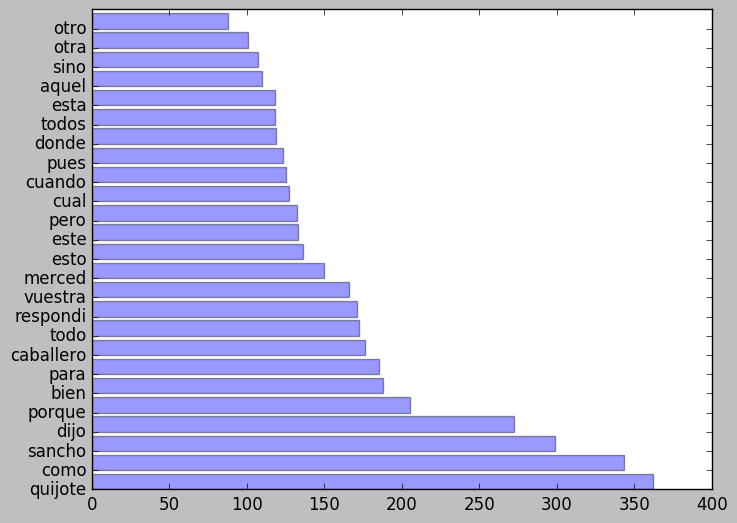

In [3]:
# create function for histogram of most frequent words
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcdefaults()

def histogram(words):
    count = map(lambda x: x[1], words)
    word = map(lambda x: x[0], words)
    plt.barh(range(len(count)), count,alpha=0.4)
    plt.yticks(range(len(count)), word)



# Change order of tuple (word, count) from (count, word)
words = words.map(lambda x:(x[1], x[0]))
words.take(25)
# display histogram
#plt.figure(figsize=(12, 14))  
histogram(words.take(25)) 
plt.show()